In [64]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [65]:
reviews_raw = pd.read_csv('../data_hyderabad/10k_reviews.csv')

In [66]:
reviews_raw.shape

(10000, 7)

In [67]:
reviews_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [70]:
reviews_raw["Rating"].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [71]:
reviews_raw = reviews_raw[reviews_raw["Rating"] != "Like"]

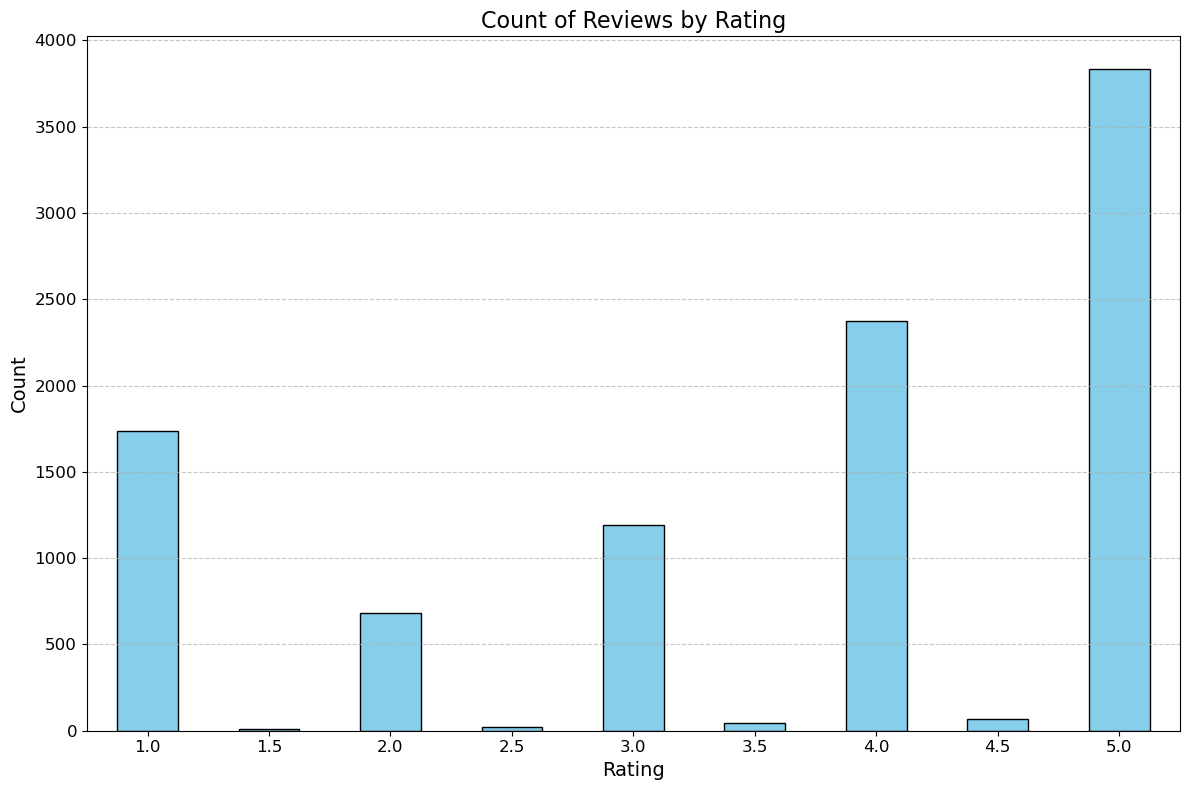

In [79]:
rating_count = reviews_raw.groupby("Rating")["Review"]

plt.figure(figsize=(12, 8))
ax = rating_count.size().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Reviews by Rating', fontsize=16)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


In [72]:
reviews_raw["Rating"] = reviews_raw["Rating"].astype(float)
reviews_raw["Time"] = pd.to_datetime(reviews_raw["Time"])

In [75]:
reviews_raw["Year"] = reviews_raw["Time"].dt.year
reviews_raw["Month"] = reviews_raw["Time"].dt.month

print(reviews_raw["Year"].value_counts().sort_index())

2016.0      43
2017.0     213
2018.0    4903
2019.0    4802
Name: Year, dtype: int64


In [74]:
print(reviews_raw["Month"].value_counts().sort_index())

1.0      652
2.0      719
3.0     1065
4.0     1247
5.0     1541
6.0      292
7.0     1331
8.0      677
9.0      645
10.0     629
11.0     569
12.0     594
Name: Month, dtype: int64


In [76]:
print(f"First review is from: {min(reviews_raw['Time'])} and last review is from: {max(reviews_raw['Time'])}")

First review is from: 2016-05-31 16:41:00 and last review is from: 2019-05-25 20:23:00


In [77]:
reviews_raw["Review_length"] = reviews_raw["Review"].apply(lambda x: len(str(x).split()))

In [78]:
#review rating by review length

rating_len = reviews_raw.groupby("Rating")["Review_length"].mean()
print(rating_len)

Rating
1.0     46.733141
1.5    117.111111
2.0     52.336257
2.5     73.210526
3.0     56.911148
3.5     83.893617
4.0     64.785082
4.5     63.971014
5.0     39.175365
Name: Review_length, dtype: float64


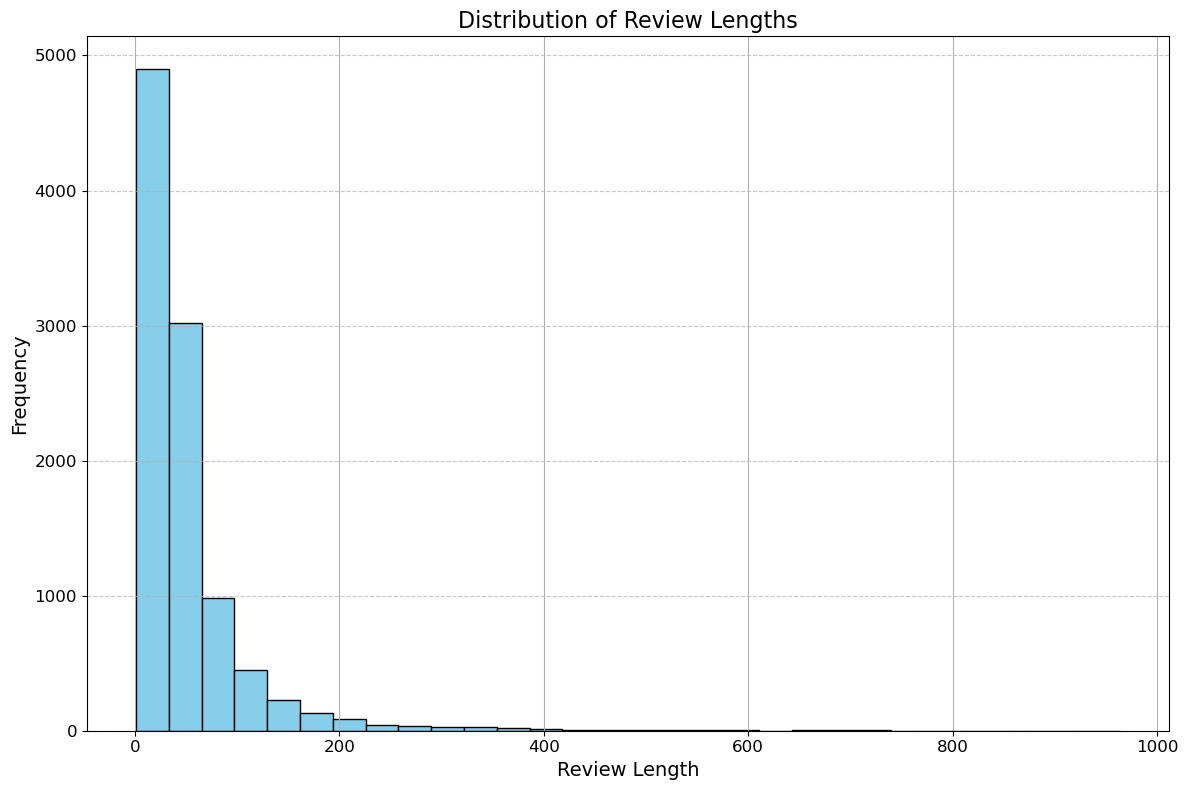

In [87]:
plt.figure(figsize=(12, 8))
reviews_raw["Review_length"].hist(bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Review Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Review Lengths', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


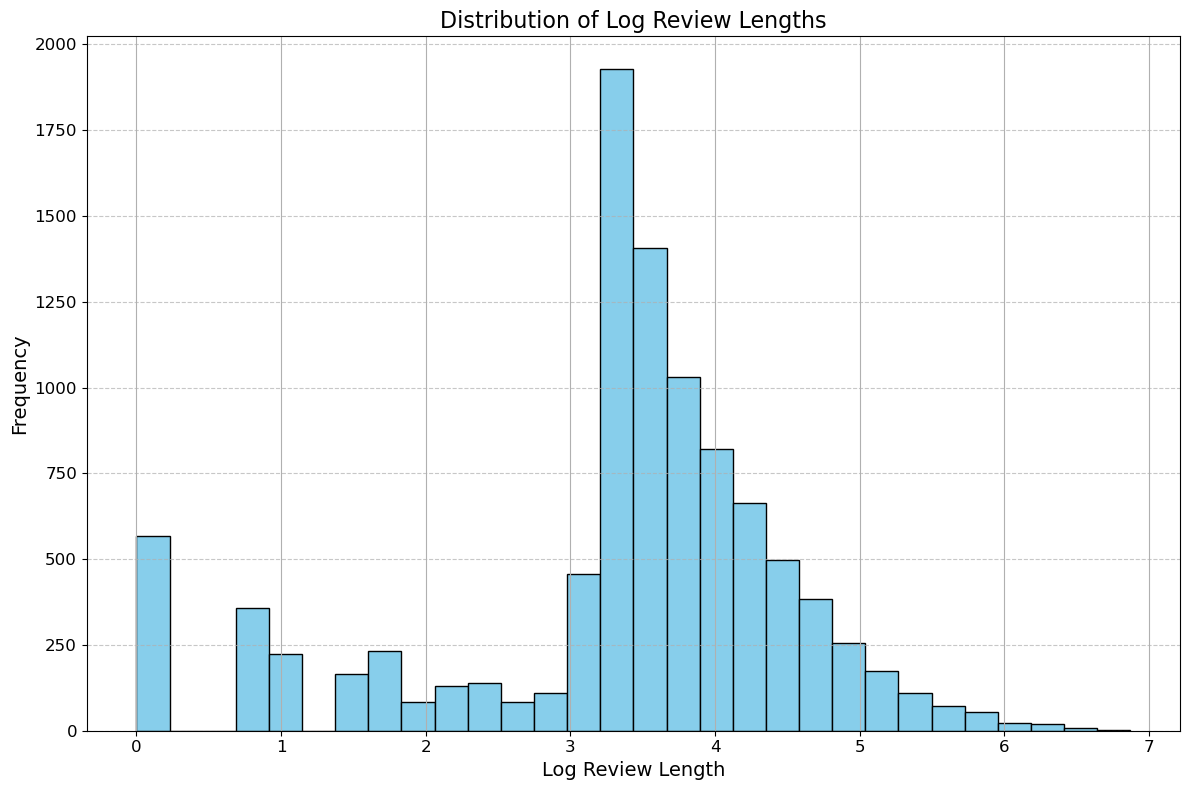

In [86]:
plt.figure(figsize=(12, 8))
log_review_length = np.log(reviews_raw["Review_length"])
log_review_length.hist(bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Log Review Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Log Review Lengths', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


In [59]:
reviews_raw["Metadata"] = reviews_raw["Metadata"].fillna('0 Reviews')

reviews_raw["N_reviews"] = reviews_raw["Metadata"].apply(lambda x: int(str(x).split()[0].replace(',', '')))

In [57]:
reviews_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Restaurant     9999 non-null   object        
 1   Reviewer       9961 non-null   object        
 2   Review         9954 non-null   object        
 3   Rating         9961 non-null   float64       
 4   Metadata       9999 non-null   object        
 5   Time           9961 non-null   datetime64[ns]
 6   Pictures       9999 non-null   int64         
 7   Review_length  9999 non-null   int64         
 8   Year           9961 non-null   float64       
 9   Month          9961 non-null   float64       
 10  N_reviews      9999 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 937.4+ KB


In [80]:
reviews_raw.describe()

,Rating,Pictures,Year,Month,Review_length
count,9961.000000,9999.000000,9961.000000,9961.000000,9999.000000
mean,3.601044,0.748575,2018.452063,6.017970,49.951995
std,1.483461,2.570508,0.562496,3.159606,60.739068
min,1.000000,0.000000,2016.000000,1.000000,1.000000
25%,3.000000,0.000000,2018.000000,4.000000,24.000000
50%,4.000000,0.000000,2018.000000,5.000000,34.000000
75%,5.000000,0.000000,2019.000000,8.000000,58.000000
max,5.000000,64.000000,2019.000000,12.000000,964.000000


what else could be done?

extract metadata and analyze it with rating

join restaurant dataset and calculate average, median rating

correlation by number of reviews and ratings and followers and rating